In [2]:
import h5py
import os
import matplotlib.pyplot as plt
from scipy.spatial.transform import Rotation as R
import numpy as np
import cv2

In [21]:
data_dir = 'experimental_data/calibrate_camera'
name = '0_0_5_0'
data_file = os.path.join(data_dir, name, 'data.hdf5')
data = h5py.File(data_file, 'r')['0']
index = len(data['observation']) //2
image = data['observation'][index]
odometry = data['odometry'][index]
position = np.asarray(odometry[:3]).round(2)
orientation = np.asarray(odometry[3:]).round(2)
print(f"Position: {position}, orientation: {orientation}")

Position: [-0. -0.  5.], orientation: [ 0. -0.  0.  1.]


global_to_drone_transformation: 
[[ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  1. -5.]
 [ 0.  0.  0.  1.]]
drone_to_camera_transformation: 
[[-1.   -0.   -0.    0.05]
 [-0.   -1.   -0.   -0.  ]
 [-0.   -0.   -1.   -0.1 ]
 [ 0.    0.    0.    1.  ]]
camera_intrinsics: 
[[100   0 100]
 [  0 100 100]
 [  0   0   1]]
point_global: [1 0 0 1]
point_drone: [ 1.  0. -5.  1.]
point_camera: [-0.95  0.    4.9   1.  ]
point_image: [ 80 100]


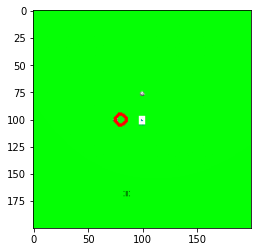

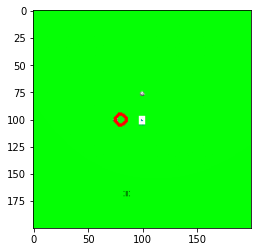

In [23]:
global_to_drone_transformation = np.identity(4)
global_to_drone_transformation[:3, :3] = R.from_quat(orientation).as_matrix()
global_to_drone_transformation[:3, 3] = position
global_to_drone_transformation = np.linalg.inv(global_to_drone_transformation)
print(f"global_to_drone_transformation: \n{global_to_drone_transformation}")

drone_to_camera_transformation = np.identity(4)
drone_to_camera_transformation[:3, :3] = -np.identity(3)
drone_to_camera_transformation[:3, 3] = [0.05, 0, -0.1]
drone_to_camera_transformation = np.linalg.inv(drone_to_camera_transformation)
print(f"drone_to_camera_transformation: \n{drone_to_camera_transformation}")

camera_intrinsics = np.asarray([[100, 0, 100], [0, 100, 100], [0, 0, 1]])
print(f"camera_intrinsics: \n{camera_intrinsics}")

point_global = np.asarray([1, 0, 0, 1])
print(f"point_global: {point_global}")
point_drone = np.matmul(global_to_drone_transformation, point_global)
print(f"point_drone: {point_drone}")
point_camera = np.matmul(drone_to_camera_transformation, point_drone)
print(f"point_camera: {point_camera}")
point_image = np.matmul(camera_intrinsics, point_camera[:3])
point_image /= point_image[2]
point_image = point_image[:2].astype(np.int32)
print(f"point_image: {point_image}")

plt.imshow(image)
plt.show()
cv2.circle(image, point_image, radius=5, color=(1, 0, 0), thickness=2)
plt.imshow(image)
plt.show()